# Visualizations

In this section, we'll do some visualization of the data that we loaded!

## Imports
These imports let us visualize the data!

In [ ]:
from datascience import *
from utils import *
from ipywidgets import *
from IPython.display import *
from math import *

import pandas as pd
import numpy as np
import plotly.express as px;
import scipy.constants as constant

<center><b><code style="font-size:30px; color:#003262">Note for Modules: This cell not needed when putting notebook components together</code></b></center>

In [ ]:
cleaner = lambda x: x.replace("Sp", "Spring ")
class_data = Table.from_df(pd.read_excel("Data/gecko.xlsx", sheet_name="Class"))
class_data["Collected"] = class_data.apply(cleaner, "Collected")
section_data = pd.read_excel("Data/gecko.xlsx", sheet_name="Sections")
section_data.columns = ['Section', 'Team', 'Mass (g)', 'Angle (deg)', 'Shear Force (N)', 'Adhesive Force (N)']
section_data = Table.from_df(section_data)

In [ ]:
class_data.show_interact()
section_data.show_interact()

<pre>Use the slider below to select how many rows to show<pre>

interactive(children=(IntSlider(value=5, description='Rows', max=543, min=1), Output()), _dom_classes=('widget…

<pre>Use the slider below to select how many rows to show<pre>

interactive(children=(IntSlider(value=5, description='Rows', max=203, min=1), Output()), _dom_classes=('widget…

> Use the cell below to view a histogram of the other numerical columns of the table.

In [ ]:
@interact(z=widgets.Dropdown(options=[2, 3, 4], description="Column Index:"))
def ploter(z):
    show(" ")
    show(class_data.labels[z], tags = ["pre style='font-size:30px'", "center"])
    px.histogram(x = class_data.column(z), marginal = "box", template='seaborn').show()

interactive(children=(Dropdown(description='Column Index:', options=(2, 3, 4), value=2), Output()), _dom_class…

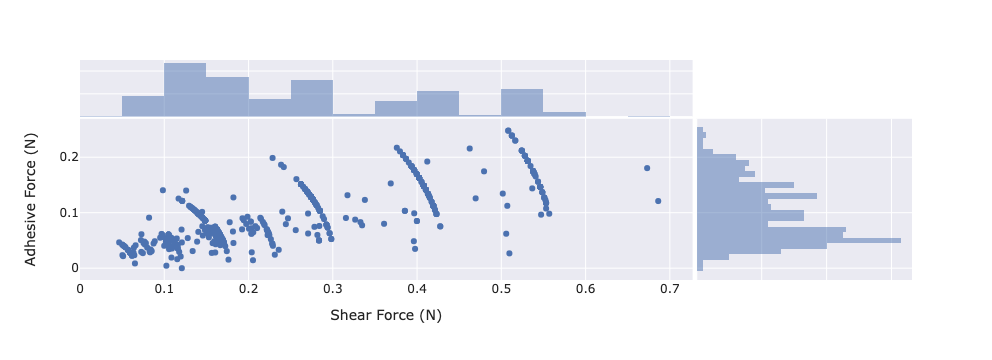

In [ ]:
px.scatter(data_frame = class_data.to_df(), 
           x="Shear Force (N)", 
           y = "Adhesive Force (N)",
           marginal_y = "histogram", 
           marginal_x = "histogram",
           template ="seaborn")

Use the cell below to view by coloring each column of the table.
> ***TIP:*** hover your mouse over the data to select it

In [ ]:
@interact(Columns = widgets.Dropdown(options = class_data.labels))
def coloered(Columns):
    px.scatter(data_frame = class_data.to_df(), 
           x="Shear Force (N)", 
           y = "Adhesive Force (N)",
           color = Columns,
           marginal_y = "histogram", 
           marginal_x = "histogram",
           template = "seaborn").show()

interactive(children=(Dropdown(description='Columns', options=('Collected', 'Mass (g)', 'Angle (deg)', 'Shear …